In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,roc_auc_score,precision_score,recall_score
from sklearn.metrics import classification_report

In [86]:
train = pd.read_csv('C://Healthcare Stroke//train_2v.csv')
test = pd.read_csv('C://Healthcare Stroke//test_2v.csv')
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [87]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [88]:
print('Train Data Shape: {}'.format(train.shape))
print('Test Data Shape: {}'.format(test.shape))

Train Data Shape: (43400, 12)
Test Data Shape: (18601, 11)


# Checking missive values

In [89]:
train_missing_values = train.isnull().sum()
train_missing_values

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

# Data preprocessing

Clean the missing values both training and testing data

In [90]:
train_data = train.dropna(axis = 0, how='any')
test_data = test.dropna(axis = 0, how='any')
print('Train Data Shape: {}'.format(train.shape))
print('Test Data Shape: {}'.format(test.shape))

Train Data Shape: (43400, 12)
Test Data Shape: (18601, 11)


# Checking unique values in a dataset

In [91]:
train_data['stroke'].unique()

array([0, 1], dtype=int64)

In [92]:
train_data['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [93]:
train_data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

# Finding the no.of patients affected by stroke

In [94]:
train_data['stroke'].value_counts()

0    28524
1      548
Name: stroke, dtype: int64

Text(0.5, 1.0, 'No.of patients affected by stroke')

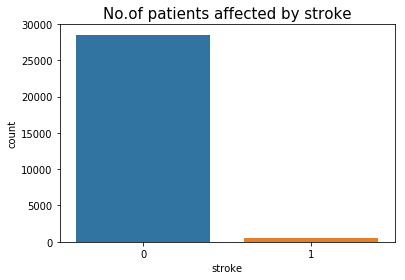

In [95]:
sns.countplot(x=train_data['stroke'])
plt.title('No.of patients affected by stroke',fontsize = 15)

# Fideing the gender count

In [96]:
train_data['gender'].value_counts()

Female    17852
Male      11213
Other         7
Name: gender, dtype: int64

# Grouping the gender based on stroke

In [97]:
train_data.groupby(['gender'])['stroke'].value_counts()

gender  stroke
Female  0         17539
        1           313
Male    0         10978
        1           235
Other   0             7
Name: stroke, dtype: int64

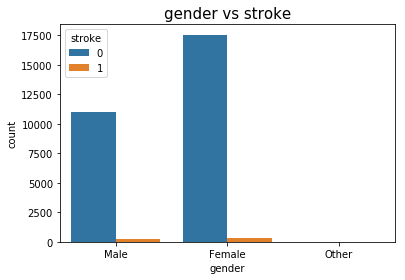

In [98]:
sns.countplot(x=train_data['gender'], hue = train_data['stroke'])
plt.title('gender vs stroke',fontsize = 15)
plt.show()

# Finding the smoking_status count

In [99]:
train_data['smoking_status'].value_counts()

never smoked       15747
formerly smoked     7099
smokes              6226
Name: smoking_status, dtype: int64

# Grouping the smoling_status based on stroke

In [100]:
train_data.groupby(['smoking_status'])['stroke'].value_counts()

smoking_status   stroke
formerly smoked  0          6919
                 1           180
never smoked     0         15491
                 1           256
smokes           0          6114
                 1           112
Name: stroke, dtype: int64

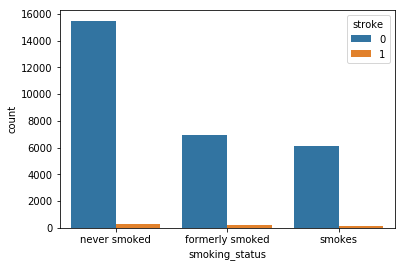

In [101]:
sns.countplot(x = train_data['smoking_status'], hue = train_data['stroke'])
plt.show()

# seperating data into two parts (object & integer)

In [102]:
str_data = train_data.select_dtypes(include=['object'])

In [103]:
str_dt = test_data.select_dtypes(include=['object'])

In [104]:
int_data = train_data.select_dtypes(include = ['integer','float'])
int_dt = test_data.select_dtypes(include = ['integer','float'])

# LabelEncoder

# Applying LabeleEncoder to convert object into integer

In [105]:
label = LabelEncoder()
features = str_data.apply(label.fit_transform)
features = features.join(int_data)
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0


# Defining featrues and label

In [106]:
xtrain = features.drop(['stroke','id'], axis = 1)
xtrain.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
1,1,1,2,1,1,58.0,1,0,87.96,39.2
3,0,1,2,0,0,70.0,0,0,69.04,35.9
6,0,1,2,1,0,52.0,0,0,77.59,17.7
7,0,1,3,0,1,75.0,0,1,243.53,27.0
8,0,1,2,0,2,32.0,0,0,77.67,32.3


In [107]:
ytrain = features['stroke']
ytrain.head()

1    0
3    0
6    0
7    0
8    0
Name: stroke, dtype: int64

# split the data into training and testing

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(xtrain,ytrain)

In [109]:
x_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
10287,0,1,2,1,0,70.0,0,0,80.50,37.6
43322,0,1,0,0,1,55.0,0,0,69.02,30.8
14391,0,0,3,1,1,25.0,0,0,134.05,48.3
18068,1,1,2,0,1,44.0,0,0,91.20,32.0
43227,1,0,0,0,1,18.0,0,0,99.16,24.9


# Building NaiveBayes Model

In [110]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB(priors=None)

In [111]:
predict = model.predict(x_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [112]:
test_score = model.score(x_test, y_test)
print("NBtest_score:", test_score)

NBtest_score: 0.9241882223445239


In [113]:
train_score = model.score(x_train, y_train)
print("NBtrain_score:",train_score)

NBtrain_score: 0.9242799486332783


# Crossvalidation

In [114]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, xtrain, ytrain, cv=5 )
cv_results

C:\Users\Hajimalang\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.03199792, 0.04028606, 0.03124189, 0.03835797, 0.03024578]),
 'score_time': array([0.00400448, 0.00399828, 0.01562309, 0.0020299 , 0.01012158]),
 'test_score': array([0.92605331, 0.91711092, 0.92364574, 0.92741658, 0.92706004]),
 'train_score': array([0.92496883, 0.92587178, 0.92466784, 0.92351019, 0.9233845 ])}

# NaiveBayes Confusion Matrix

In [115]:
conf_mtr = pd.crosstab(y_test, predict)
conf_mtr

col_0,0,1
stroke,,
0,6680,443
1,108,37


# Classification Report for naivebayes

In [116]:
report = classification_report(y_test, predict)
print(report)

             precision    recall  f1-score   support

          0       0.98      0.94      0.96      7123
          1       0.08      0.26      0.12       145

avg / total       0.97      0.92      0.94      7268



# Building Decision Tree Model

In [117]:
dt_mod = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8)
dt_mod.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [118]:
y_pred = dt_mod.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
ts_dt_score = dt_mod.score(x_test, y_test)
print("DTtest_score:", ts_dt_score)

DTtest_score: 0.982526141992295


In [80]:
tn_dt_score = dt_mod.score(x_train, y_train)
print("DTtrain_score:",tn_dt_score)

DTtrain_score: 0.9823426894147863


In [81]:
from sklearn.model_selection import cross_validate
cv_result = cross_validate(dt_mod, xtrain, ytrain, cv=5 )
cv_result

C:\Users\Hajimalang\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.14618039, 0.12996817, 0.13351798, 0.13315916, 0.12679577]),
 'score_time': array([0.01562309, 0.        , 0.        , 0.        , 0.00405264]),
 'test_score': array([0.97987962, 0.97919175, 0.97919175, 0.97936017, 0.97952864]),
 'train_score': array([0.98280088, 0.98284387, 0.98267188, 0.98318858, 0.98254439])}

# DecisionTreeClassifier Confusion Matrix

In [119]:
conf_mt = pd.crosstab(y_test,y_pred)
conf_mt

col_0,0,1
stroke,,
0,7123,0
1,131,14


# Classification Report for DecisionTreeClassifier

In [120]:
reports = classification_report(y_test, y_pred)
print(reports)

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      7123
          1       1.00      0.10      0.18       145

avg / total       0.98      0.98      0.97      7268



# Building Neural Network

In [122]:
mlp_model = MLPClassifier()
mlp_model.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [123]:
mlp_predict = mlp_model.predict(x_test)
mlp_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [124]:
ts_mlp_score = mlp_model.score(x_test, y_test)
print("NNtest_score:", ts_mlp_score)

NNtest_score: 0.9794991744634012


In [125]:
ts_mlp_score = mlp_model.score(x_train, y_train)
print("NNtrain_score:", ts_mlp_score)

NNtrain_score: 0.9814254265272427


In [126]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(mlp_model, xtrain, ytrain, cv=10 )
cv_results

C:\Users\Hajimalang\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([3.36671734, 4.79857326, 2.20814538, 3.82973647, 5.3937397 ,
        6.14023399, 4.44286633, 2.61289024, 4.99989486, 4.92754126]),
 'score_time': array([0.00800037, 0.0119977 , 0.01012492, 0.01017356, 0.00800586,
        0.01199913, 0.01021242, 0.00800729, 0.01015687, 0.00208426]),
 'test_score': array([0.98108666, 0.97936726, 0.98143054, 0.98108666, 0.98108015,
        0.98108015, 0.98108015, 0.98108015, 0.98141776, 0.98141776]),
 'train_score': array([0.98115732, 0.97756459, 0.98062223, 0.98100443, 0.98115804,
        0.98119625, 0.98115804, 0.98115804, 0.98112054, 0.98112054])}

In [127]:
conf_mt = pd.crosstab(y_test,mlp_predict)
conf_mt

col_0,0,1
stroke,,
0,7119,4
1,145,0


In [128]:
reports = classification_report(y_test, mlp_predict)
print(reports)

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      7123
          1       0.00      0.00      0.00       145

avg / total       0.96      0.98      0.97      7268

